## Deep svdd

In [1]:
# Deep SVDD 모듈 import
import sys
import os
# deep_svdd 모듈에서 필요한 클래스와 함수 import
from deep_svdd import (
    get_mnist, 
    TrainerDeepSVDD, 
    eval,
    device,
    args
)


# 현재 노트북과 같은 디렉토리의 deep_svdd.py를 import하기 위한 경로 설정
current_dir = os.path.dirname(os.path.abspath(''))
if current_dir not in sys.path:
    sys.path.insert(0, current_dir)


print(f"Device: {device}")
print(f"Args: {args}")


Device: cpu
Args: {'num_epochs': 50, 'num_epochs_ae': 50, 'lr': 0.001, 'lr_ae': 0.001, 'weight_decay': 5e-07, 'weight_decay_ae': 0.005, 'lr_milestones': [50], 'batch_size': 1024, 'pretrain': True, 'latent_dim': 32, 'normal_class': 0}


In [2]:

# weights 디렉토리 생성 (pretrained weights 저장용)
import os
weights_dir = '../weights'
if not os.path.exists(weights_dir):
    os.makedirs(weights_dir)
    print(f"Created directory: {weights_dir}")
else:
    is_pretrained = True
    print(f"Directory already exists: {weights_dir}")


Directory already exists: ../weights


In [3]:
# Train/Test Loader 불러오기
dataloader_train, dataloader_test = get_mnist(args, data_dir='../data/')
print(f"Train batches: {len(dataloader_train)}")
print(f"Test batches: {len(dataloader_test)}")


Train batches: 6
Test batches: 10


In [4]:
# Network 학습준비, 구조 불러오기
deep_SVDD = TrainerDeepSVDD(args, dataloader_train, device)
print("TrainerDeepSVDD initialized")


TrainerDeepSVDD initialized


In [5]:
# DeepSVDD를 위한 DeepLearning pretrain 모델로 Weight 학습
if args.pretrain and not is_pretrained:
    print("Starting pretraining...")
    deep_SVDD.pretrain()
    print("Pretraining completed!")
else:
    print("Pretraining skipped (args.pretrain=False)")


Pretraining skipped (args.pretrain=False)


In [6]:
# 학습된 가중치로 Deep_SVDD모델 Train
print("Starting Deep SVDD training...")
net, c = deep_SVDD.train()
print("Training completed!")


Starting Deep SVDD training...


Training Deep SVDD... Epoch: 0, Loss: 1.358
Training Deep SVDD... Epoch: 1, Loss: 0.330
Training Deep SVDD... Epoch: 2, Loss: 0.148
Training Deep SVDD... Epoch: 3, Loss: 0.096
Training Deep SVDD... Epoch: 4, Loss: 0.067
Training Deep SVDD... Epoch: 5, Loss: 0.050
Training Deep SVDD... Epoch: 6, Loss: 0.041
Training Deep SVDD... Epoch: 7, Loss: 0.034
Training Deep SVDD... Epoch: 8, Loss: 0.031
Training Deep SVDD... Epoch: 9, Loss: 0.025
Training Deep SVDD... Epoch: 10, Loss: 0.022
Training Deep SVDD... Epoch: 11, Loss: 0.020
Training Deep SVDD... Epoch: 12, Loss: 0.018
Training Deep SVDD... Epoch: 13, Loss: 0.016
Training Deep SVDD... Epoch: 14, Loss: 0.015
Training Deep SVDD... Epoch: 15, Loss: 0.016
Training Deep SVDD... Epoch: 16, Loss: 0.014
Training Deep SVDD... Epoch: 17, Loss: 0.013
Training Deep SVDD... Epoch: 18, Loss: 0.013
Training Deep SVDD... Epoch: 19, Loss: 0.011
Training Deep SVDD... Epoch: 20, Loss: 0.011
Training Deep SVDD... Epoch: 21, Loss: 0.011
Training Deep SVDD..

In [30]:
# 모델 평가
labels, scores = eval(net, c, dataloader_test, device)
print("Evaluation completed!")
print(f"Labels shape: {labels.shape}")
print(f"Scores shape: {scores.shape}")




Testing...
ROC AUC score: 96.60
Evaluation completed!
Labels shape: (10000,)
Scores shape: (10000,)


In [57]:
# 각종 metric 계산
from sklearn.metrics import roc_auc_score, roc_curve, f1_score
import numpy as np

# AUC 계산
auc = roc_auc_score(labels, scores)
# ROC Curve로 FPR, TPR 계산 (임곗값별, 여기선 임계값=0.5에서의 값 예시)
fpr, tpr, thresholds = roc_curve(labels, scores)

for thresh in [ 0.1,0.08, 0.05, 0.01]:
    binary_pred = (scores >= thresh).astype(int)
    f1 = f1_score(labels, binary_pred)
    fpr_value = (binary_pred != labels).sum() / len(labels)
    tpr_value = ((labels == 1) & (binary_pred == 1)).sum() / (labels == 1).sum()
    print(f"\n--- Threshold: {thresh} ---")
    print(f"AUC: {auc:.4f}")
    print(f"FPR (at threshold={thresh}): {fpr_value:.4f}")
    print(f"TPR (at threshold={thresh}): {tpr_value:.4f}")
    print(f"최대 TPR: {np.max(tpr):.4f}")
    print(f"최소 FPR: {np.min(fpr):.4f}")
    print(f"f1 score (at threshold={thresh}): {f1:.4f}")


--- Threshold: 0.1 ---
AUC: 0.9660
FPR (at threshold=0.1): 0.1866
TPR (at threshold=0.1): 0.7997
최대 TPR: 1.0000
최소 FPR: 0.0000
f1 score (at threshold=0.1): 0.8855

--- Threshold: 0.08 ---
AUC: 0.9660
FPR (at threshold=0.08): 0.1034
TPR (at threshold=0.08): 0.8959
최대 TPR: 1.0000
최소 FPR: 0.0000
f1 score (at threshold=0.08): 0.9399

--- Threshold: 0.05 ---
AUC: 0.9660
FPR (at threshold=0.05): 0.0339
TPR (at threshold=0.05): 0.9880
최대 TPR: 1.0000
최소 FPR: 0.0000
f1 score (at threshold=0.05): 0.9813

--- Threshold: 0.01 ---
AUC: 0.9660
FPR (at threshold=0.01): 0.0980
TPR (at threshold=0.01): 1.0000
최대 TPR: 1.0000
최소 FPR: 0.0000
f1 score (at threshold=0.01): 0.9485


## Deep SVDD Ablation Study
정규화 계수 $\nu$, 학습률, 임베딩 차원 $p$의 조합을 대상으로 Deep SVDD 성능을 비교합니다. 여기서 $\nu$는 구현상 Adam의 weight decay 항으로 적용해 구(球) 학습 중 정규화를 조절합니다.

In [64]:
import itertools
import copy
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve, f1_score
import numpy as np

# 하이퍼파라미터 값 정의
nu_values = [1e-4, 1e-3, 1e-2]
latent_dims = [32, 64, 128]
threshs = [0.1, 0.08, 0.05, 0.01]

ablation_records = []
total_runs = len(nu_values) * len(latent_dims)  

run_idx = 0

# nu, lr, latent_dim에 따라 결과 기록
for nu,  latent_dim in itertools.product(nu_values,  latent_dims):
    run_idx += 1
    print(f"\n[{run_idx}/{total_runs}] nu={nu:.0e}, latent_dim={latent_dim}")
    run_args = copy.deepcopy(args)
    run_args.weight_decay = nu
    run_args.lr = 0.001
    run_args.latent_dim = latent_dim
    run_args.pretrain = False  # latent_dim이 달라질 때는 사전학습 가중치를 사용할 수 없음

    trainer = TrainerDeepSVDD(run_args, dataloader_train, device)
    net, c = trainer.train()
    labels, scores = eval(net, c, dataloader_test, device)
    auc = roc_auc_score(labels, scores)
    fpr_arr, tpr_arr, roc_thresholds = roc_curve(labels, scores)
    for thresh in threshs:
        binary_pred = (scores >= thresh).astype(int)
        f1 = f1_score(labels, binary_pred)
        # threshold와 가장 가까운 위치 찾기
        thresh_idx = np.argmin(np.abs(roc_thresholds - thresh))
        tpr_at_thresh = tpr_arr[thresh_idx]
        fpr_at_thresh = fpr_arr[thresh_idx]

        ablation_records.append({
            'nu': nu,
            'latent_dim': latent_dim,
            'thresh': thresh,
            'roc_auc': auc,
            'f1': f1,
            'tpr': tpr_at_thresh,
            'fpr': fpr_at_thresh
        })
        print(f"Thresh={thresh:.3f} | AUC: {auc*100:.2f} | F1: {f1:.3f} | TPR: {tpr_at_thresh:.3f} | FPR: {fpr_at_thresh:.3f}")

ablation_df = pd.DataFrame(ablation_records)
ablation_df = ablation_df.sort_values('roc_auc', ascending=False).reset_index(drop=True)
ablation_df.head()



[1/9] nu=1e-04, latent_dim=32
Training Deep SVDD... Epoch: 0, Loss: 17.590
Training Deep SVDD... Epoch: 1, Loss: 2.769
Training Deep SVDD... Epoch: 2, Loss: 1.227
Training Deep SVDD... Epoch: 3, Loss: 0.745
Training Deep SVDD... Epoch: 4, Loss: 0.438
Training Deep SVDD... Epoch: 5, Loss: 0.267
Training Deep SVDD... Epoch: 6, Loss: 0.205
Training Deep SVDD... Epoch: 7, Loss: 0.171
Training Deep SVDD... Epoch: 8, Loss: 0.140
Training Deep SVDD... Epoch: 9, Loss: 0.119
Training Deep SVDD... Epoch: 10, Loss: 0.106
Training Deep SVDD... Epoch: 11, Loss: 0.096
Training Deep SVDD... Epoch: 12, Loss: 0.088
Training Deep SVDD... Epoch: 13, Loss: 0.081
Training Deep SVDD... Epoch: 14, Loss: 0.076
Training Deep SVDD... Epoch: 15, Loss: 0.072
Training Deep SVDD... Epoch: 16, Loss: 0.068
Training Deep SVDD... Epoch: 17, Loss: 0.064
Training Deep SVDD... Epoch: 18, Loss: 0.061
Training Deep SVDD... Epoch: 19, Loss: 0.059
Training Deep SVDD... Epoch: 20, Loss: 0.056
Training Deep SVDD... Epoch: 21, 

,nu,latent_dim,thresh,roc_auc,f1,tpr,fpr
0,0.0001,64,0.01,0.992125,0.948475,1.000000,1.000000
1,0.0001,64,0.05,0.992125,0.985518,0.999667,0.274490
2,0.0001,64,0.08,0.992125,0.990000,0.987916,0.071429
3,0.0001,64,0.10,0.992125,0.977311,0.960421,0.040816
4,0.0001,128,0.10,0.986738,0.980633,0.999224,0.344898


In [68]:
best_config = ablation_df.sort_values(['fpr', 'tpr'], ascending=[True, False]).iloc[0]
print(
    f"Best AUC setting | nu={best_config['nu']:.0e}, thresh={best_config['thresh']:.1e}, "
    f"p={int(best_config['latent_dim'])}, AUC={best_config['roc_auc'] * 100:.2f}, "
    f"F1={best_config['f1']:.3f}, TPR={best_config['tpr'] * 100:.2f}, FPR={best_config['fpr'] * 100:.2f}"
)

summary_df = (
    ablation_df
    .sort_values(['roc_auc', 'f1'], ascending=[False, False])
    .reset_index(drop=True)
)
summary_df.assign(
    roc_auc_pct=lambda df: df['roc_auc'] * 100,
    tpr_pct=lambda df: df['tpr'] * 100,
    fpr_pct=lambda df: df['fpr'] * 100
)




Best AUC setting | nu=1e-03, thresh=1.0e-01, p=32, AUC=96.65, F1=0.600, TPR=41.72, FPR=0.31


,nu,latent_dim,thresh,roc_auc,f1,tpr,fpr,roc_auc_pct,tpr_pct,fpr_pct
0,0.0001,64,0.08,0.992125,0.990000,0.987916,0.071429,99.212476,98.791574,7.142857
1,0.0001,64,0.05,0.992125,0.985518,0.999667,0.274490,99.212476,99.966741,27.448980
2,0.0001,64,0.10,0.992125,0.977311,0.960421,0.040816,99.212476,96.042129,4.081633
3,0.0001,64,0.01,0.992125,0.948475,1.000000,1.000000,99.212476,100.000000,100.000000
4,0.0001,128,0.10,0.986738,0.980633,0.999224,0.344898,98.673775,99.922395,34.489796
5,0.0001,128,0.08,0.986738,0.972658,0.999778,0.524490,98.673775,99.977827,52.448980
6,0.0001,128,0.05,0.986738,0.956167,1.000000,1.000000,98.673775,100.000000,100.000000
7,0.0001,128,0.01,0.986738,0.948475,1.000000,1.000000,98.673775,100.000000,100.000000
8,0.0100,64,0.08,0.985470,0.983302,0.979268,0.115306,98.547038,97.926829,11.530612
9,0.0100,64,0.05,0.985470,0.981089,0.998004,0.334694,98.547038,99.800443,33.469388


In [11]:
best_deep_svdd_score = f"{best_config['roc_auc']:.4f}"



## 비교 실험: KDE, GMM, LOF, PCA, AE, One-Class SVM


In [12]:
# 필요한 라이브러리 import
from sklearn.neighbors import KernelDensity
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
import torch.optim as optim
import pandas as pd

# 결과 저장용 딕셔너리
results = {}


In [13]:
from sklearn.metrics import roc_auc_score, roc_curve, f1_score


def compute_metrics(y_true, scores):
    auc = roc_auc_score(y_true, scores)
    fpr_curve, tpr_curve, thresholds = roc_curve(y_true, scores)
    best_f1 = -np.inf
    best_stats = {'tpr': 0.0, 'fpr': 0.0, 'threshold': thresholds[0] if len(thresholds) > 0 else 0.0}

    for fpr_val, tpr_val, thresh in zip(fpr_curve, tpr_curve, thresholds):
        preds = (scores >= thresh).astype(int)
        current_f1 = f1_score(y_true, preds)
        if current_f1 > best_f1:
            best_f1 = current_f1
            best_stats = {'tpr': tpr_val, 'fpr': fpr_val, 'threshold': thresh}

    return {
        'scores': scores,
        'auc': auc,
        'f1': best_f1,
        'tpr': best_stats['tpr'],
        'fpr': best_stats['fpr'],
        'threshold': best_stats['threshold']
    }


def print_metrics(name, metrics):
    print(
        f"{name} Metrics -> AUC: {metrics['auc']:.4f}, "
        f"F1: {metrics['f1']:.3f}, "
        f"TPR: {metrics['tpr'] * 100:.2f}%, "
        f"FPR: {metrics['fpr'] * 100:.2f}%, "
        f"thr={metrics['threshold']:.4f}"
    )



In [14]:
from deep_svdd import (
    get_mnist_ex
)
data_dict = get_mnist_ex(args,  data_dir='../data/')
# #data_dict
# {
#         "x_train": x_train,
#         "y_train": y_train,
#         "x_test": x_test,
#         "y_test": y_test,
#         "dataloader_train": dataloader_train,
#         "dataloader_test": dataloader_test
#     }


In [15]:

# 데이터 정규화 (일부 알고리즘은 정규화가 필요)
scaler = StandardScaler()

X_train_raw = data_dict["x_train"]
X_test_raw = data_dict["x_test"]

X_train_np = np.array(X_train_raw)
X_test_np = np.array(X_test_raw)

if X_train_np.ndim > 2:
    X_train_np = X_train_np.reshape(X_train_np.shape[0], -1)
if X_test_np.ndim > 2:
    X_test_np = X_test_np.reshape(X_test_np.shape[0], -1)

X_train_np = X_train_np.astype(np.float32) / 255.0
X_test_np = X_test_np.astype(np.float32) / 255.0

X_train_scaled = scaler.fit_transform(X_train_np)
X_test_scaled = scaler.transform(X_test_np)
print("Data scaled successfully")


C:\Users\jspar\AppData\Local\Temp\ipykernel_67416\4255807394.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  X_train_np = np.array(X_train_raw)
C:\Users\jspar\AppData\Local\Temp\ipykernel_67416\4255807394.py:8: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  X_test_np = np.array(X_test_raw)


Data scaled successfully


In [16]:

from sklearn.metrics import roc_auc_score  # Add this import to fix NameError

# 1. KDE (Kernel Density Estimation)
print("=" * 50)
print("1. Training KDE...")
kde = KernelDensity(kernel='gaussian', bandwidth=0.2)
kde.fit(X_train_scaled)

# Test 데이터에 대한 log-likelihood 계산 (낮을수록 이상)
kde_scores = -kde.score_samples(X_test_scaled)  # 음수로 변환하여 높을수록 이상
results['KDE'] = compute_metrics(data_dict["y_test"], kde_scores)
print_metrics("KDE", results['KDE'])


1. Training KDE...
KDE Metrics -> AUC: 0.7727, F1: 0.950, TPR: 99.76%, FPR: 94.90%, thr=-508.1620


In [17]:
# 2. GMM (Gaussian Mixture Model)
print("=" * 50)
print("2. Training GMM...")

# 공분산 붕괴 방지를 위한 정규화 및 dtype 변환
X_train_gmm = X_train_scaled.astype(np.float64, copy=False)
X_test_gmm = X_test_scaled.astype(np.float64, copy=False)

gmm = GaussianMixture(n_components=5, random_state=42, max_iter=200, reg_covar=1e-5)
gmm.fit(X_train_gmm)

# Test 데이터에 대한 log-likelihood 계산 (낮을수록 이상)
gmm_scores = -gmm.score_samples(X_test_gmm)  # 음수로 변환하여 높을수록 이상
results['GMM'] = compute_metrics(data_dict["y_test"], gmm_scores)
print_metrics("GMM", results['GMM'])


2. Training GMM...
GMM Metrics -> AUC: 0.9419, F1: 0.978, TPR: 99.27%, FPR: 35.31%, thr=-1444.8498


In [18]:
# 3. LOF (Local Outlier Factor)
print("=" * 50)
print("3. Training LOF...")
# LOF는 fit_predict를 사용하지만, anomaly_score_를 사용하여 점수 얻기
lof = LocalOutlierFactor(n_neighbors=20, novelty=True, contamination=0.1)
lof.fit(X_train_scaled)

# Test 데이터에 대한 점수 계산 (높을수록 이상)
lof_scores = -lof.score_samples(X_test_scaled)  # 음수로 변환하여 높을수록 이상
results['LOF'] = compute_metrics(data_dict["y_test"], lof_scores)
print_metrics("LOF", results['LOF'])


3. Training LOF...
LOF Metrics -> AUC: 0.9310, F1: 0.979, TPR: 99.69%, FPR: 36.33%, thr=1.0910


In [19]:
# 4. PCA (Principal Component Analysis)
print("=" * 50)
print("4. Training PCA...")
n_components = 50  # 주성분 개수
pca = PCA(n_components=n_components, random_state=42)
pca.fit(X_train_scaled)

# Test 데이터를 주성분 공간으로 변환 후 원래 공간으로 재구성
X_test_pca = pca.transform(X_test_scaled)
X_test_reconstructed = pca.inverse_transform(X_test_pca)

# 재구성 오차 계산 (높을수록 이상)
pca_scores = np.mean((X_test_scaled - X_test_reconstructed) ** 2, axis=1)
results['PCA'] = compute_metrics(data_dict["y_test"], pca_scores)
print_metrics("PCA", results['PCA'])


4. Training PCA...
PCA Metrics -> AUC: 0.9600, F1: 0.988, TPR: 99.32%, FPR: 15.10%, thr=0.2012


In [20]:
# 5. AutoEncoder (AE)
print("=" * 50)
print("5. Training AutoEncoder...")

import torch

class AutoEncoder(nn.Module):
    def __init__(self, input_dim, encoding_dim=32):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, encoding_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim)
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# AutoEncoder 학습
input_dim = X_train_scaled.shape[1]
ae_model = AutoEncoder(input_dim, encoding_dim=32).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(ae_model.parameters(), lr=0.001)

# 데이터를 tensor로 변환
X_train_tensor = torch.FloatTensor(X_train_scaled).to(device)
X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)

# 학습
ae_model.train()
n_epochs = 50
batch_size = 256
for epoch in range(n_epochs):
    total_loss = 0
    for i in range(0, len(X_train_tensor), batch_size):
        batch = X_train_tensor[i:i+batch_size]
        optimizer.zero_grad()
        reconstructed = ae_model(batch)
        loss = criterion(reconstructed, batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {total_loss/len(X_train_tensor)*batch_size:.6f}")

# Test 데이터에 대한 재구성 오차 계산
ae_model.eval()
with torch.no_grad():
    X_test_reconstructed = ae_model(X_test_tensor)
    ae_scores = torch.mean((X_test_tensor - X_test_reconstructed) ** 2, dim=1).cpu().numpy()

results['AE'] = compute_metrics(data_dict["y_test"], ae_scores)
print_metrics("AE", results['AE'])


5. Training AutoEncoder...
Epoch [10/50], Loss: 0.388209
Epoch [20/50], Loss: 0.318863
Epoch [30/50], Loss: 0.272643
Epoch [40/50], Loss: 0.243862
Epoch [50/50], Loss: 0.223312
AE Metrics -> AUC: 0.9645, F1: 0.990, TPR: 99.51%, FPR: 13.57%, thr=0.2409


In [21]:
# 6. One-Class SVM
print("=" * 50)
print("6. Training One-Class SVM...")
ocsvm = OneClassSVM(kernel='rbf', gamma='scale', nu=0.1)
ocsvm.fit(X_train_scaled)

# Test 데이터에 대한 점수 계산 (낮을수록 이상, 음수는 이상치)
ocsvm_scores = -ocsvm.score_samples(X_test_scaled)  # 음수로 변환하여 높을수록 이상
results['One-Class SVM'] = compute_metrics(data_dict["y_test"], ocsvm_scores)
print_metrics("One-Class SVM", results['One-Class SVM'])


6. Training One-Class SVM...
One-Class SVM Metrics -> AUC: 0.9598, F1: 0.986, TPR: 99.15%, FPR: 17.45%, thr=-36.2972


In [ ]:
ocsvm_model = globals().get("ocsvm")
ocsvm_kernel = getattr(ocsvm_model, "kernel", "N/A") if ocsvm_model else "N/A"
ocsvm_gamma = getattr(ocsvm_model, "gamma", "N/A") if ocsvm_model else "N/A"
ocsvm_nu = getattr(ocsvm_model, "nu", "N/A") if ocsvm_model else "N/A"

hyperparam_rows = [
    {
        "Method": "Deep SVDD",
        "Key Hyperparameters": (
            f"nu={best_config['nu']:.0e}, lr={best_config['lr']:.1e}, "
            f"latent_dim={int(best_config['latent_dim'])}, pretrain={args.pretrain}"
        ),
    },
    {
        "Method": "KDE",
        "Key Hyperparameters": f"kernel={kde.kernel}, bandwidth={kde.bandwidth}",
    },
    {
        "Method": "GMM",
        "Key Hyperparameters": (
            f"n_components={gmm.n_components}, covariance_type={gmm.covariance_type}, "
            f"reg_covar={gmm.reg_covar}"
        ),
    },
    {
        "Method": "LOF",
        "Key Hyperparameters": (
            f"n_neighbors={lof.n_neighbors}, contamination={lof.contamination}, "
            f"novelty={lof.novelty}"
        ),
    },
    {
        "Method": "PCA",
        "Key Hyperparameters": f"n_components={n_components}",
    },
    {
        "Method": "AutoEncoder",
        "Key Hyperparameters": (
            f"encoding_dim=32, hidden_layers=[128,64], epochs={n_epochs}, "
            f"lr=0.001, batch_size={batch_size}"
        ),
    },
    {
        "Method": "One-Class SVM",
        "Key Hyperparameters": (
            f"kernel={ocsvm_kernel}, gamma={ocsvm_gamma}, nu={ocsvm_nu}"
        ),
    },
]

hyperparam_df = pd.DataFrame(hyperparam_rows)
hyperparam_df


In [22]:
# 결과 비교 테이블 생성
print("\n" + "=" * 70)
print("COMPARISON RESULTS")
print("=" * 70)

comparison_df = pd.DataFrame([
    {
        'Method': method,
        'ROC AUC': metrics['auc'],
        'F1': metrics['f1'],
        'TPR (%)': metrics['tpr'] * 100,
        'FPR (%)': metrics['fpr'] * 100
    }
    for method, metrics in results.items()
]).sort_values('ROC AUC', ascending=False)

formatters = {
    'ROC AUC': '{:.4f}'.format,
    'F1': '{:.3f}'.format,
    'TPR (%)': '{:.2f}'.format,
    'FPR (%)': '{:.2f}'.format
}

print(comparison_df.to_string(index=False, formatters=formatters))
print("=" * 70)



COMPARISON RESULTS
       Method ROC AUC    F1 TPR (%) FPR (%)
           AE  0.9645 0.990   99.51   13.57
          PCA  0.9600 0.988   99.32   15.10
One-Class SVM  0.9598 0.986   99.15   17.45
          GMM  0.9419 0.978   99.27   35.31
          LOF  0.9310 0.979   99.69   36.33
          KDE  0.7727 0.950   99.76   94.90


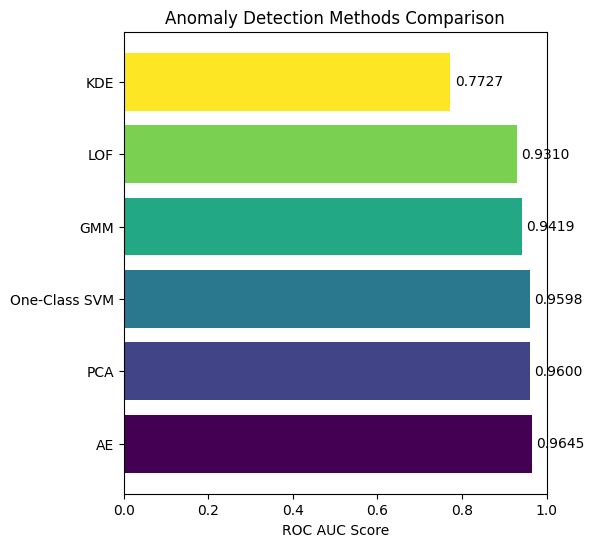

In [23]:
# 결과 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# ROC AUC 비교 바 차트
plt.subplot(1, 2, 1)
methods = comparison_df['Method'].values
aucs = comparison_df['ROC AUC'].values
colors = plt.cm.viridis(np.linspace(0, 1, len(methods)))
plt.barh(methods, aucs, color=colors)
plt.xlabel('ROC AUC Score')
plt.title('Anomaly Detection Methods Comparison')
plt.xlim([0, 1])
for i, v in enumerate(aucs):
    plt.text(v + 0.01, i, f'{v:.4f}', va='center')


